In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
import os
import shutil

base_dir = "yolov8_sorie"
os.makedirs(f"{base_dir}/images/train", exist_ok=True)
os.makedirs(f"{base_dir}/labels/train", exist_ok=True)

src_img_dir = "/kaggle/input/sroie-datasetv2/SROIE2019/train/img"
for img_file in os.listdir(src_img_dir):
    shutil.copy(os.path.join(src_img_dir, img_file), f"{base_dir}/images/train")

In [50]:
from PIL import Image
import os

src_box_dir = "/kaggle/input/sroie-datasetv2/SROIE2019/train/box"
label_out_dir = f"{base_dir}/labels/train"

for file in os.listdir(src_box_dir):
    image_path = os.path.join(src_img_dir, file.replace(".txt", ".jpg"))
    if not os.path.exists(image_path):
        continue
    img = Image.open(image_path)
    w, h = img.size
    yolo_lines = []
    with open(os.path.join(src_box_dir, file), "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split(",")
            if len(parts) < 9:
                continue
            coords = list(map(int, parts[:8]))
            text = ",".join(parts[8:])

            x_min = min(coords[0::2])
            x_max = max(coords[0::2])
            y_min = min(coords[1::2])
            y_max = max(coords[1::2])

            # YOLO format
            x_center = (x_min + x_max) / 2 / w
            y_center = (y_min + y_max) / 2 / h
            width = (x_max - x_min) / w
            height = (y_max - y_min) / h

            yolo_lines.append(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    with open(os.path.join(label_out_dir, file), "w") as out_f:
        out_f.write("\n".join(yolo_lines))

In [51]:
import os

os.makedirs("yolov8_sorie", exist_ok=True)

data_yaml = """
path: yolov8_sorie
train: images/train
val: images/train  # optionally split into val
nc: 1
names: ["text"]
"""

with open("yolov8_sorie/data.yaml", "w") as f:
    f.write(data_yaml)

In [5]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.2 MB/s eta 0:00:00:00:0100:01


In [52]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="/kaggle/working/yolov8_sorie/data.yaml",
    epochs=10,
    imgsz=640,
    batch=8,
    name="yolov8_sroie_run",
    project="runs"
)


Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/yolov8_sorie/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_sroie_run4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

train: Scanning /kaggle/working/yolov8_sorie/labels/train.cache... 626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 626/626 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 710.4±85.6 MB/s, size: 762.3 KB)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
val: Scanning /kaggle/working/yolov8_sorie/labels/train.cache... 626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 626/626 [00:00<?, ?it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `toke

Plotting labels to runs/yolov8_sroie_run4/labels.jpg... 


Corrupt JPEG data: 33 extraneous bytes before marker 0xd9


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/yolov8_sroie_run4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.15G      1.861      1.449      1.302        374        640:  86%|████████▌ | 68/79 [00:13<00:01,  5.97it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       1/10      7.15G      1.797      1.371      1.267         84        640: 100%|██████████| 79/79 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:08<00:00,  4.92it/s]


                   all        626      33626      0.835      0.804      0.867      0.525


Corrupt JPEG data: 33 extraneous bytes before marker 0xd9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G      1.302     0.8081      1.024        296        640:  63%|██████▎   | 50/79 [00:08<00:05,  4.93it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       2/10      4.29G      1.298     0.7942      1.019         83        640: 100%|██████████| 79/79 [00:13<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.03it/s]


                   all        626      33626      0.888      0.872      0.921       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.71G      1.191     0.7403     0.9651        464        640:   3%|▎         | 2/79 [00:00<00:12,  6.24it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       3/10      4.72G      1.235     0.7203     0.9908        397        640:  82%|████████▏ | 65/79 [00:11<00:02,  6.14it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       3/10      4.72G      1.233     0.7186     0.9918        172        640: 100%|██████████| 79/79 [00:13<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:08<00:00,  4.79it/s]


                   all        626      33626      0.909       0.89      0.931      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.72G      1.391      0.745     0.9924        561        640:   1%|▏         | 1/79 [00:00<00:11,  6.67it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       4/10      4.72G      1.238     0.7135     0.9948        488        640:  49%|████▉     | 39/79 [00:06<00:06,  5.99it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       4/10      4.72G      1.248     0.7126     0.9945         81        640: 100%|██████████| 79/79 [00:13<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.05it/s]


                   all        626      33626      0.916      0.882      0.933      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.72G       1.23     0.6846     0.9874        408        640:   5%|▌         | 4/79 [00:00<00:12,  5.83it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       5/10      4.72G      1.211     0.6858     0.9823        334        640:  44%|████▍     | 35/79 [00:06<00:07,  5.60it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       5/10      4.75G      1.183      0.674     0.9701        141        640: 100%|██████████| 79/79 [00:13<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.25it/s]


                   all        626      33626      0.925      0.891      0.943      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       6/10      4.75G      1.141     0.6399     0.9523        361        640:  46%|████▌     | 36/79 [00:06<00:07,  5.75it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       6/10      4.75G      1.159     0.6472     0.9562        148        640: 100%|██████████| 79/79 [00:13<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.17it/s]


                   all        626      33626      0.921      0.906      0.949      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       7/10      4.75G      1.097     0.6226     0.9426        368        640:  47%|████▋     | 37/79 [00:06<00:07,  5.50it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       7/10      4.79G      1.102     0.6191     0.9431         84        640: 100%|██████████| 79/79 [00:13<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.13it/s]


                   all        626      33626      0.935      0.914      0.953      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       8/10      4.79G      1.088     0.5989      0.934        407        640:  78%|███████▊  | 62/79 [00:10<00:02,  5.97it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       8/10      4.79G      1.084     0.5988     0.9337         86        640: 100%|██████████| 79/79 [00:13<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.24it/s]


                   all        626      33626      0.938      0.916      0.951      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.79G       1.17      0.676     0.9459        468        640:   3%|▎         | 2/79 [00:00<00:12,  6.32it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       9/10      4.79G      1.078     0.5892      0.928        372        640:  15%|█▌        | 12/79 [00:02<00:11,  5.62it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
       9/10      4.83G      1.078     0.5816     0.9334         89        640: 100%|██████████| 79/79 [00:13<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:08<00:00,  4.93it/s]


                   all        626      33626      0.946      0.923       0.96      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.83G      1.128     0.6138     0.9133        409        640:   1%|▏         | 1/79 [00:00<00:11,  6.63it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
      10/10      4.83G      1.059      0.568     0.9234        447        640:  51%|█████     | 40/79 [00:07<00:06,  6.00it/s]Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
      10/10      4.83G      1.043     0.5673     0.9235         83        640: 100%|██████████| 79/79 [00:13<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:07<00:00,  5.23it/s]

                   all        626      33626      0.951      0.924       0.96      0.674



10 epochs completed in 0.063 hours.
Optimizer stripped from runs/yolov8_sroie_run4/weights/last.pt, 22.5MB


Corrupt JPEG data: 33 extraneous bytes before marker 0xd9


Optimizer stripped from runs/yolov8_sroie_run4/weights/best.pt, 22.5MB

Validating runs/yolov8_sroie_run4/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:10<00:00,  3.92it/s]
Corrupt JPEG data: 33 extraneous bytes before marker 0xd9
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        626      33626      0.951      0.924       0.96      0.674
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/yolov8_sroie_run4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b25b6f5d910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /kaggle/input/sroie-datasetv2/SROIE2019/test/img/X00016469670.jpg: 640x352 49 texts, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 352)


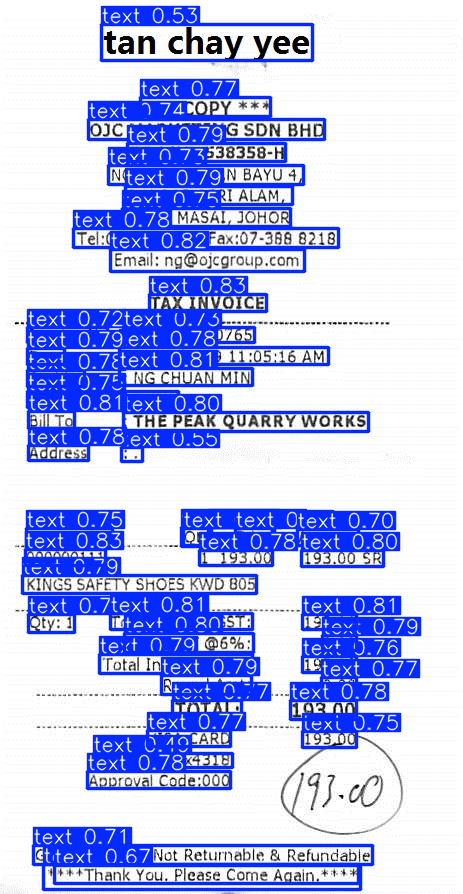

In [53]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

model = YOLO("/kaggle/working/runs/yolov8_sroie_run4/weights/best.pt")

img_path = "/kaggle/input/sroie-datasetv2/SROIE2019/test/img/X00016469670.jpg"
results = model(img_path)
results[0].show()


In [55]:
from PIL import Image
import os
from tqdm import tqdm

box_dir = "/kaggle/input/sroie-datasetv2/SROIE2019/train/box"
img_dir = "/kaggle/input/sroie-datasetv2/SROIE2019/train/img"
crop_out_dir = "trocr_crops"
os.makedirs(crop_out_dir, exist_ok=True)

data_pairs = []

for file in tqdm(sorted(os.listdir(box_dir))):
    if not file.endswith(".txt"):
        continue

    image_base = file.replace(".txt", "")
    possible_img_paths = [
        os.path.join(img_dir, image_base + ext)
        for ext in [".jpg", ".jpeg", ".png", ".JPG"]
    ]
    image_path = next((p for p in possible_img_paths if os.path.exists(p)), None)
    if image_path is None:
        continue

    image = Image.open(image_path).convert("RGB")
    with open(os.path.join(box_dir, file), "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            parts = line.strip().split(",")
            if len(parts) < 9:
                continue
            try:
                coords = list(map(int, parts[:8]))
            except:
                continue
            text = ",".join(parts[8:]).strip()
            if not text:
                continue 
            x_min = min(coords[0::2])
            x_max = max(coords[0::2])
            y_min = min(coords[1::2])
            y_max = max(coords[1::2])
            if x_max - x_min < 5 or y_max - y_min < 5:
                continue
            try:
                crop = image.crop((x_min, y_min, x_max, y_max))
            except:
                continue
            crop_file = f"{image_base}_{i}.png"
            crop_path = os.path.join(crop_out_dir, crop_file)
            crop.save(crop_path)
            data_pairs.append({"image": crop_path, "text": text})
            if len(data_pairs) >= 50:
                break
    if len(data_pairs) >= 2000:
        break

print(f"✅ Total valid crops used: {len(data_pairs)}")


100%|██████████| 626/626 [00:21<00:00, 28.65it/s]

✅ Total valid crops used: 674


In [56]:
from transformers import TrOCRProcessor
from PIL import Image
import torch

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

def preprocess(example):
    image = Image.open(example["image"]).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values.squeeze(0)
    labels = processor.tokenizer(
        example["text"],
        padding="max_length",
        max_length=64,
        truncation=True,
        return_tensors="pt"
    ).input_ids.squeeze(0)
    
    labels[labels == processor.tokenizer.pad_token_id] = -100

    return {
        "pixel_values": pixel_values,
        "labels": labels
    }
    
processed_dataset = dataset.map(preprocess)
processed_dataset.set_format(type="torch")

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [57]:
from transformers import VisionEncoderDecoderModel, TrainingArguments, Trainer
from peft import get_peft_model, LoraConfig, TaskType

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q_proj", "v_proj"]
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

trainable params: 761,856 || all params: 334,683,648 || trainable%: 0.2276


In [58]:
import wandb
wandb.login(key="18946a3daf153db603cd8664ccfc5a513caf14d5")


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [59]:
class TrOCRDataCollator:
    def __call__(self, features):
        pixel_values = torch.stack([f["pixel_values"] for f in features])
        labels = torch.stack([f["labels"] for f in features])
        return {"pixel_values": pixel_values, "labels": labels}


In [60]:
from transformers import VisionEncoderDecoderModel
from peft import get_peft_model, LoraConfig, TaskType
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
base_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
decoder = base_model.decoder

peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q_proj", "v_proj"]  
)

decoder = get_peft_model(decoder, peft_config)
decoder.print_trainable_parameters()
base_model.decoder = decoder

base_model.config.decoder_start_token_id = processor.tokenizer.cls_token_id or processor.tokenizer.bos_token_id
base_model.config.pad_token_id = processor.tokenizer.pad_token_id
base_model.config.eos_token_id = processor.tokenizer.eos_token_id


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

trainable params: 761,856 || all params: 248,030,208 || trainable%: 0.3072


In [65]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./trocr_lora_output",
    per_device_train_batch_size=4,
    num_train_epochs=10,
    logging_steps=10,
    save_steps=100,
    eval_strategy="no",
    fp16=True,
    report_to=["wandb"]
)

trainer = Trainer(
    model=base_model,
    args=training_args,
    train_dataset=processed_dataset,
    tokenizer=processor.tokenizer,
    data_collator=TrOCRDataCollator()
)


In [66]:
trainer.train()

Step,Training Loss
10,2.720500
20,2.169100
30,2.380600
40,1.985500
50,2.002100
60,1.568300
70,1.458700


TrainOutput(global_step=70, training_loss=2.040673909868513, metrics={'train_runtime': 58.4772, 'train_samples_per_second': 8.55, 'train_steps_per_second': 1.197, 'total_flos': 3.75153657643008e+17, 'train_loss': 2.040673909868513, 'epoch': 10.0})

In [67]:
model.eval()
image = Image.open("/kaggle/input/sample1242/Screenshot 2025-06-24 152853.png").convert("RGB")
inputs = processor(images=image, return_tensors="pt").to(model.device)

generated_ids = model.generate(**inputs)
print(processor.batch_decode(generated_ids, skip_special_tokens=True)[0])


KENNED OF FAYMENT ?


In [69]:
from ultralytics import YOLO
import cv2
from PIL import Image
import torch

yolo_model = YOLO("/kaggle/working/runs/yolov8_sroie_run4/weights/best.pt")

image_path = "/kaggle/input/sroie-datasetv2/SROIE2019/test/img/X51005230616.jpg"
img = cv2.imread(image_path)

results = yolo_model(img)[0]
bboxes = results.boxes.xyxy.cpu().numpy()
img_pil = Image.open(image_path).convert("RGB")

crops = []
for box in bboxes:
    x1, y1, x2, y2 = map(int, box)
    crop = img_pil.crop((x1, y1, x2, y2))
    crops.append(crop)

from transformers import TrOCRProcessor

model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

recognized_texts = []

for crop in crops:
    inputs = processor(images=crop, return_tensors="pt").to(device)
    with torch.no_grad():
        generated_ids = model.generate(**inputs)
    text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    recognized_texts.append(text)

for i, text in enumerate(recognized_texts):
    print(f"Box {i+1}: {text}")


0: 640x224 50 texts, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 224)
Box 1: MFY side 1
Box 2: 1 M. Coke
Box 3: 1m.fries
Box 4: 2 M. Spicydeboxe
Box 5: 2.20
Box 6: No.3 , Jalan SS21739.47400 Petaling Jaya
Box 7: 1 Sma"1 Come
Box 8: Take Out Total ( incl GST )
Box 9: ORD 490-REG 419- 18JO1Y2018 17.09.21
Box 10: 2 M. Fries
Box 11: 2m.coke
Box 12: tax invoice .
Box 13: to share your experience
Box 14: 12.50
Box 15: 11.10
Box 16: ustomer Service Hotline : 03-776-5600
Box 17: Google Play-App Store
Box 18: 1.000
Box 19: Total Rounded
Box 20: ( GST ID no. 000504654064 )
Box 21: 38.90
Box 22: 190
Box 23: Download My McD Feedback from
Box 24: 665351-mp
Box 25: N. I love to hear your feedback !
Box 26: Total includes 696 GST
Box 27: change
Box 28: 25.40
Box 29: Visit www.mcdfeedback. com. my
Box 30: 50,000
Box 31: Cash Tendered
Box 32: 38.90
Box 33: Licensee of McDonald's
Box 34: # formerly known as
Box 35: McDonald's Petronas Taman Melati 